In [6]:
%pip install -q plotly
%pip install -q --upgrade nbformat

import sys
import sys, subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px

subprocess.check_call([sys.executable, "-m", "pip", "install", "-U", "nbformat", "ipython", "plotly", "ipywidgets"])

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


0

In [ ]:
iris = pd.read_csv('../data/iris.csv')

In [ ]:
### Histogram
features = iris.columns.to_list()

fig, axes = plt.subplots(2,2, figsize=(10,8))

for ax, feature in zip(axes.ravel(), features):
    ax.hist(iris[feature], bins=20, color="steelblue", edgecolor="black")
    ax.set_title(feature)
    ax.set_xlabel("Value")
    ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()


### Skews
- Wouldn't say skew but there are a cluster with Petal Length between 1-2
- Pedal Width has a skew ~1
### Spread
- Sepal Length has a wide spread
- Sepal Width has a narrow spread
### Outliers
- Pedal Width has a few outliers ~0.1

In [ ]:
### Correlation matrix

correlation_matrix = iris.corr(numeric_only=True)

plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.title('Correlation Matrix Heatmap')
plt.show()

# Correlation
### High Correlation:
Sepal Length and Petal Width: 0.82
Sepal Length and Petal Length: 0.96

### Week Correlation
Sepal Width and Petal Length: -0.42
Sepal Width and Petal Width: -0.35

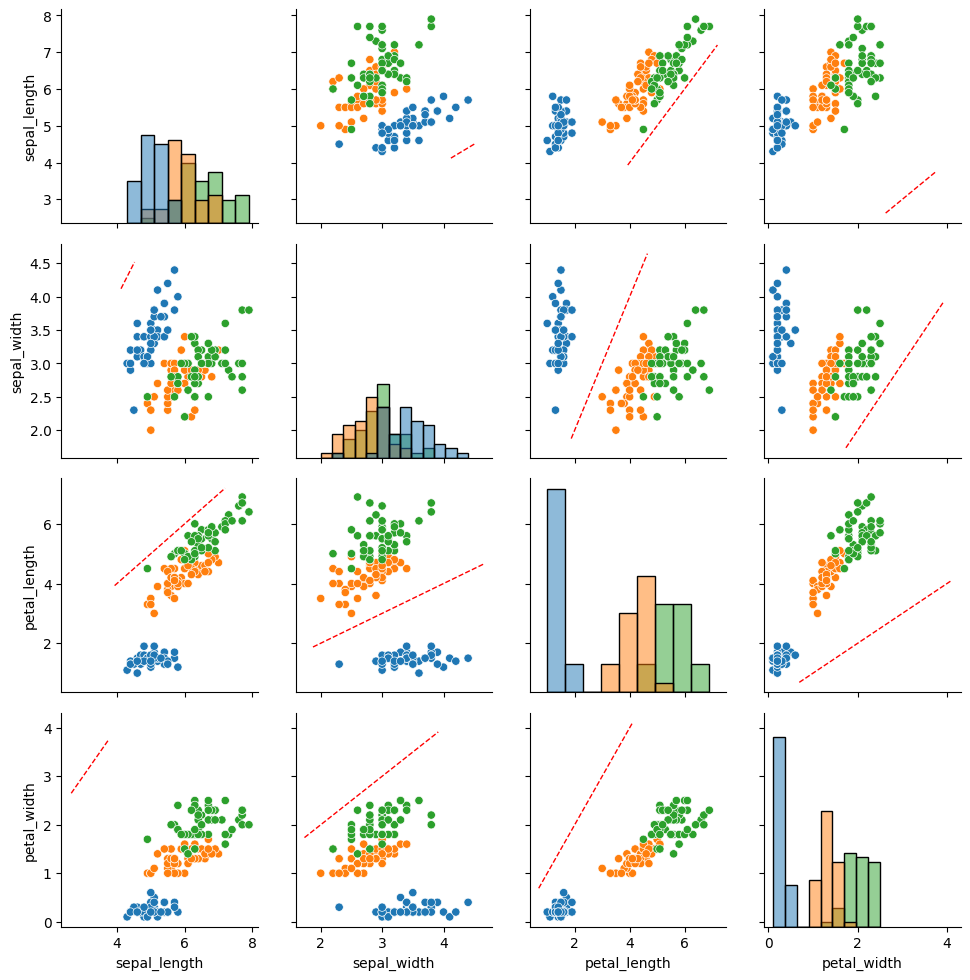

In [7]:
# Pair Plot

# Create the PairGrid object
g = sns.PairGrid(iris, vars=["sepal_length", "sepal_width", "petal_length", "petal_width"], hue="species")

# Map scatter plots to the upper and lower triangles of the grid
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)

# Map histograms to the diagonal
g.map_diag(sns.histplot)

# Iterate through the axes to add lines to specific subplots
for i, j in np.ndindex(g.axes.shape):
    ax = g.axes[i, j]
    if i != j:  # Only for off-diagonal plots (scatter plots)
        # Get the limits of the current subplot's x and y axes
        x_min, x_max = ax.get_xlim()
        y_min, y_max = ax.get_ylim()

        # Plot an identity line (y=x)
        ax.plot([max(x_min, y_min), min(x_max, y_max)], [max(x_min, y_min), min(x_max, y_max)], color="red", linestyle="--", linewidth=1)

plt.show()

In [11]:
fig = px.violin(
    iris.melt(id_vars="species", value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"]),
    x="species",
    y="value",
    color='species',
    facet_col='variable',
    box=True,
    points='all',
)

fig.show()

### Obeservation
Based off the 4 feature plots. petal_length feature gives the cleanest class split.